In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
# import csv of lightpole raw
lightpole_raw = pd.read_csv('lightpole.csv', sep=',', header=None)

In [3]:
# convert to np array

lightpole = np.array(lightpole_raw)

In [4]:
# extract individual plot location

x = lightpole[:, 0]
y = lightpole[:, 1]
z = lightpole[:, 2]

In [5]:
# modify x and y (assume vertical and horizontal location doesn't matter in visualization)

decimal_minx = int(min(x))
decimal_miny = int(min(y))
decimal_minz = int(min(z))

for i in range(len(x)):
    x[i] = (x[i] - decimal_minx) * 10
    y[i] = (y[i] - decimal_miny) * 10
    z[i] = (z[i] - decimal_minz)

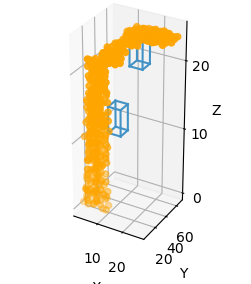

In [125]:
# Hypothetical

max_depth = 5 # This should be modifiable

# Data scatter plot

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='orange')

[box_max_w, box_max_l, box_max_h] = [math.ceil(max(x)), 
                                     math.ceil(max(y)), 
                                     math.ceil(max(z))]

[box_gap_w, box_gap_l, box_gap_h] = [math.floor(box_max_w / max_depth), 
                                     math.floor(box_max_l / max_depth), 
                                     math.floor(box_max_h / max_depth)]

colors = [[0,0,0], [8,48,107], [8,81,156], [33,113,181], [66,146,198], 
          [107,174,214], [158,202,225], [198,219,239], [222,235,247], [247,251,255]]

edges = [(0,1), (1,2), (2,3), (3,0),(4,5), (5,6), (6,7), (7,4), (0,4), (1,5), (2,6), (3,7)]

# Bottom-Up Approach


# Two Sample Children (base case)

[box_x1, box_y1, box_z1] = [random.randint(0, max_bounds[0]), 
                            random.randint(0, max_bounds[1]), 
                            random.randint(0, max_bounds[2])]

[box_x2, box_y2, box_z2] = [random.randint(0, max_bounds[0]), 
                            random.randint(0, max_bounds[1]), 
                            random.randint(0, max_bounds[2])]

[box_half_w, box_half_l, box_half_h] = [box_gap_w / 2, 
                                        box_gap_l / 2, 
                                        box_gap_h / 2]

box1 = np.array([
    [box_x1 - box_half_w, box_y1 - box_half_l, box_z1 - box_half_h],
    [box_x1 + box_half_w, box_y1 - box_half_l, box_z1 - box_half_h],
    [box_x1 + box_half_w, box_y1 + box_half_l, box_z1 - box_half_h],
    [box_x1 - box_half_w, box_y1 + box_half_l, box_z1 - box_half_h],
    [box_x1 - box_half_w, box_y1 - box_half_l, box_z1 + box_half_h],
    [box_x1 + box_half_w, box_y1 - box_half_l, box_z1 + box_half_h],
    [box_x1 + box_half_w, box_y1 + box_half_l, box_z1 + box_half_h],
    [box_x1 - box_half_w, box_y1 + box_half_l, box_z1 + box_half_h]
])

for edge in edges:
    p1, p2 = box1[edge[0]], box1[edge[1]]
    ax.plot3D(*zip(p1, p2), color=[c / 255 for c in colors[max_depth - 1]])

box2 = np.array([
    [box_x2- box_half_w, box_y2 - box_half_l, box_z2 - box_half_h],
    [box_x2+ box_half_w, box_y2 - box_half_l, box_z2 - box_half_h],
    [box_x2+ box_half_w, box_y2 + box_half_l, box_z2 - box_half_h],
    [box_x2- box_half_w, box_y2 + box_half_l, box_z2 - box_half_h],
    [box_x2- box_half_w, box_y2 - box_half_l, box_z2 + box_half_h],
    [box_x2+ box_half_w, box_y2 - box_half_l, box_z2 + box_half_h],
    [box_x2+ box_half_w, box_y2 + box_half_l, box_z2 + box_half_h],
    [box_x2- box_half_w, box_y2 + box_half_l, box_z2 + box_half_h]
])

for edge in edges:
    p1, p2 = box2[edge[0]], box2[edge[1]]
    ax.plot3D(*zip(p1, p2), color=[c / 255 for c in colors[max_depth - 1]])


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,2.5])

plt.show()

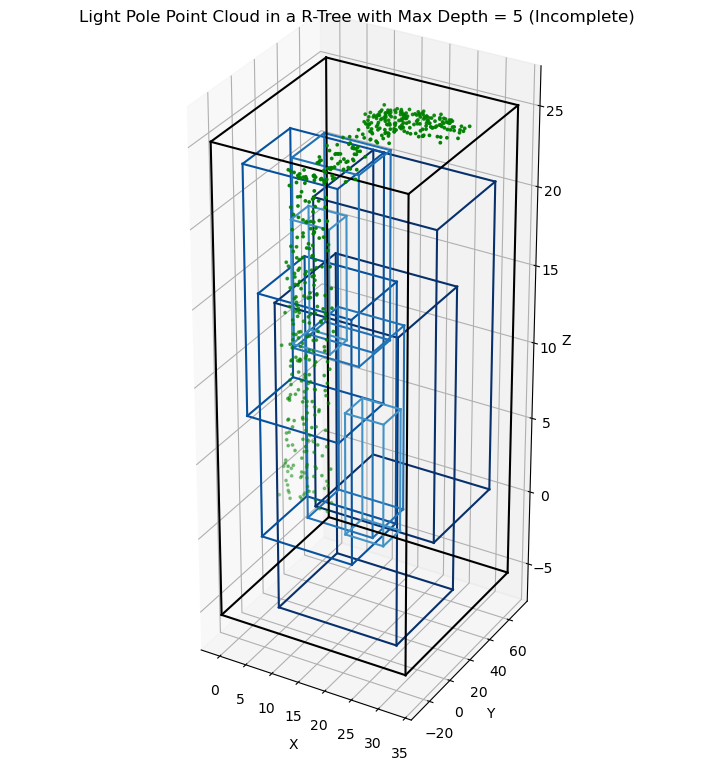

In [23]:
# TODO: Make it more general

# Hypothetical

max_depth = 5 # This should be modifiable

# Data scatter plot

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='green', s=3)

[box_max_w, box_max_l, box_max_h] = [math.ceil(max(x)), 
                                     math.ceil(max(y)), 
                                     math.ceil(max(z))]

[box_gap_w, box_gap_l, box_gap_h] = [math.floor(box_max_w / max_depth), 
                                     math.floor(box_max_l / max_depth), 
                                     math.floor(box_max_h / max_depth)]

colors = [[0,0,0], [8,48,107], [8,81,156], [33,113,181], [66,146,198], 
          [107,174,214], [158,202,225], [198,219,239], [222,235,247], [247,251,255]]

edges = [(0,1), (1,2), (2,3), (3,0),(4,5), (5,6), (6,7), (7,4), (0,4), (1,5), (2,6), (3,7)]

# Top-Down Approach

# TODO: Better be binary tree, so the performance is better

# TODO: Need to constantly adjust the bounding box size for the smaller bounding boxes

def visualize_rtree(max_depth, count, box1_min_bound, box1_max_bound, box2_min_bound, box2_max_bound):
    
    if (count == max_depth): 
        
        # TODO: 
        # Another Base Case: the bounding box size = [1,1,1]
        
        # TODO:
        # For now, it is just a rough base case with the whole plot being the root bounding box
        # Will shrink the root bounding box to a little bit larger than the max of its children bounding box
        
        root_minx, root_maxx = ax.get_xlim()
        root_miny, root_maxy = ax.get_ylim()
        root_minz, root_maxz = ax.get_zlim()
        
        box1 = np.array([
            [root_minx, root_miny, root_minz], 
            [root_maxx, root_miny, root_minz], 
            [root_maxx, root_maxy, root_minz], 
            [root_minx, root_maxy, root_minz],
            [root_minx, root_miny, root_maxz], 
            [root_maxx, root_miny, root_maxz],
            [root_maxx, root_maxy, root_maxz], 
            [root_minx, root_maxy, root_maxz]
        ])
        
        for edge in edges:
            p1, p2 = box1[edge[0]], box1[edge[1]]
            ax.plot3D(*zip(p1, p2), color=[c / 255 for c in colors[0]])
        
        return
    else:

        [box_x1, box_y1, box_z1] = [random.randint(box1_min_bound[0], box1_max_bound[0]), 
                                    random.randint(box1_min_bound[1], box1_max_bound[1]), 
                                    random.randint(box1_min_bound[2], box1_max_bound[2])]
        
        [box_x2, box_y2, box_z2] = [random.randint(box2_min_bound[0], box2_max_bound[0]), 
                                    random.randint(box2_min_bound[1], box2_max_bound[1]), 
                                    random.randint(box2_min_bound[2], box2_max_bound[2])]
        
        [box_half_w, box_half_l, box_half_h] = [(box_max_w - box_gap_w * (count)) / 2,
                                        (box_max_l - box_gap_l * (count)) / 2,
                                        (box_max_h - box_gap_h * (count)) / 2]

        box1 = np.array([
            [box_x1 - box_half_w, box_y1 - box_half_l, box_z1 - box_half_h],
            [box_x1 + box_half_w, box_y1 - box_half_l, box_z1 - box_half_h],
            [box_x1 + box_half_w, box_y1 + box_half_l, box_z1 - box_half_h],
            [box_x1 - box_half_w, box_y1 + box_half_l, box_z1 - box_half_h],
            [box_x1 - box_half_w, box_y1 - box_half_l, box_z1 + box_half_h],
            [box_x1 + box_half_w, box_y1 - box_half_l, box_z1 + box_half_h],
            [box_x1 + box_half_w, box_y1 + box_half_l, box_z1 + box_half_h],
            [box_x1 - box_half_w, box_y1 + box_half_l, box_z1 + box_half_h]
        ])
        
        box2 = np.array([
            [box_x2- box_half_w, box_y2 - box_half_l, box_z2 - box_half_h],
            [box_x2+ box_half_w, box_y2 - box_half_l, box_z2 - box_half_h],
            [box_x2+ box_half_w, box_y2 + box_half_l, box_z2 - box_half_h],
            [box_x2- box_half_w, box_y2 + box_half_l, box_z2 - box_half_h],
            [box_x2- box_half_w, box_y2 - box_half_l, box_z2 + box_half_h],
            [box_x2+ box_half_w, box_y2 - box_half_l, box_z2 + box_half_h],
            [box_x2+ box_half_w, box_y2 + box_half_l, box_z2 + box_half_h],
            [box_x2- box_half_w, box_y2 + box_half_l, box_z2 + box_half_h]
        ])

        for edge in edges:
            p1, p2 = box1[edge[0]], box1[edge[1]]
            ax.plot3D(*zip(p1, p2), color=[c / 255 for c in colors[count]])
        
        for edge in edges:
            p1, p2 = box2[edge[0]], box2[edge[1]]
            ax.plot3D(*zip(p1, p2), color=[c / 255 for c in colors[count]])
        
        return visualize_rtree(max_depth, 
                               count + 1, 
                               [math.floor(box_x1 - box_half_w), math.floor(box_y1 - box_half_l), math.floor(box_z1 - box_half_h)],
                               [math.ceil(box_x1 + box_half_w), math.ceil(box_y1 + box_half_l), math.ceil(box_z1 + box_half_h)],
                               [math.floor(box_x2 - box_half_w), math.floor(box_y2 - box_half_l), math.floor(box_z2 - box_half_h)],
                               [math.ceil(box_x2 + box_half_w), math.ceil(box_y2 + box_half_l), math.ceil(box_z2 + box_half_h)])


visualize_rtree(max_depth, 
                1, 
                [0,0,0], 
                [box_max_w, box_max_l, box_max_h], 
                [0,0,0], 
                [box_max_w, box_max_l, box_max_h])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,2.5])

plt.title('Light Pole Point Cloud in a R-Tree with Max Depth = 5 (Incomplete)')
plt.show()

### R-Tree Visualization Implementation

1. Need to constantly adjust the bounding box size for the smaller bounding boxes
2. Another Base Case: the bounding box size = [1,1,1]
3. For now, it is just a rough base case with the whole plot being the root bounding box ... will shrink the root bounding box to a little bit larger than the max of its children bounding box
4. Better be binary tree, so the performance is better
5. Make it more general (already general??)
6. Performance measure

1. Rename the colormap label

1. I need to fix the octree a little bit...

### Octree, K-D Tree, R-Tree Implementation

1. performance measure

### Tool selection (later)
1. What is the software for inputing point cloud data into Octree & K-D tree & R-Tree? 
        * Implement the trees
        * Measure the performance (memory used, speed)
2. What is the tool for measuring the speed of spatial data retrieval?
3. What is the tool for measuring the speed of building an actual Octree & K-D Tree & R-Tree (Do we need to implement the tree structures)